# Code Description

In [1]:
              
                 ##-----****---"On the Stability Region of Intermittent Interference Networks"---****-----##
        
                             #- This code simulates the results of data bits life time -#

                                  ## ---- Sajjad Nassirpour and Alireza Vahid ---- ##
        
                       ## ---- Electrical engineering at University of Codolardo Denver ---- ##
            

# Import Packages

In [1]:
## ---- Import essential packages ---- ## 
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

## Function for finding the row of origin queues in Control Table 

In [2]:
## ---- Calculation for finding the row in control table ---- ##
def ctrl_I_finder(number_of_packets_Q1,number_of_packets_Q2):
    if number_of_packets_Q1[0,0]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=0
            pointer_2=0
            control_num=15
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=0
            pointer_2=1
            control_num=12
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=0
            pointer_2=3
            control_num=13
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=0
            pointer_2=2
            control_num=14
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=0
            pointer_2=4
            control_num=21

        
    elif number_of_packets_Q1[0,1]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=1
            pointer_2=0
            control_num=9
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=1
            pointer_2=1
            control_num=0
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=1
            pointer_2=3
            control_num=1
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=1
            pointer_2=2
            control_num=2
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=1
            pointer_2=4
            control_num=22

            
    elif number_of_packets_Q1[0,2]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=2
            pointer_2=0
            control_num=10
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=2
            pointer_2=1
            control_num=3
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=2
            pointer_2=3
            control_num=4
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=2
            pointer_2=2
            control_num=5
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=2
            pointer_2=4
            control_num=23
            
            
    elif number_of_packets_Q1[0,3]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=3
            pointer_2=0
            control_num=11
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=3
            pointer_2=1
            control_num=6
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=3
            pointer_2=3
            control_num=7
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=3
            pointer_2=2
            control_num=8
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=3
            pointer_2=4
            control_num=24 
            
            
    elif number_of_packets_Q1[0,4]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=4
            pointer_2=0
            control_num=16
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=4
            pointer_2=1
            control_num=17
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=4
            pointer_2=3
            control_num=19
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=4
            pointer_2=2
            control_num=18
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=4
            pointer_2=4
            control_num=20
          
      
    return pointer_1,pointer_2,control_num


## Function for finding the SN number

In [3]:
def case_cal(q11,q12,q21,q22):
    if q11==1 and q12==1 and q21==1 and q22==1:
        case_num=1
    elif q11==1 and q12==1 and q21==0 and q22==1:
        case_num=2
    elif q11==1 and q12==0 and q21==1 and q22==1:
        case_num=3
    elif q11==1 and q12==0 and q21==0 and q22==1:
        case_num=4
    elif q11==1 and q12==0 and q21==0 and q22==0:
        case_num=5
    elif q11==1 and q12==1 and q21==0 and q22==0:
        case_num=6
    elif q11==1 and q12==0 and q21==1 and q22==0:
        case_num=7
    elif q11==1 and q12==1 and q21==1 and q22==0:
        case_num=8
    elif q11==0 and q12==0 and q21==0 and q22==1:
        case_num=9
    elif q11==0 and q12==0 and q21==1 and q22==1:
        case_num=10
    elif q11==0 and q12==1 and q21==0 and q22==1:
        case_num=11
    elif q11==0 and q12==1 and q21==1 and q22==1:
        case_num=12
    elif q11==0 and q12==0 and q21==1 and q22==0:
        case_num=13
    elif q11==0 and q12==1 and q21==0 and q22==0:
        case_num=14
    elif q11==0 and q12==1 and q21==1 and q22==0:
        case_num=15
    elif q11==0 and q12==0 and q21==0 and q22==0:
        case_num=16
    return case_num


# Function for data movement when only T1 has data bits to send

In [4]:
def T1_select(number_of_packets_Q1,q11,q12):
    if number_of_packets_Q1[0,0]!=0:
        pointer_1=0
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=1

    elif number_of_packets_Q1[0,1]!=0:
        pointer_1=1
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=2
    elif number_of_packets_Q1[0,2]!=0:
        pointer_1=2
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=3
    elif number_of_packets_Q1[0,3]!=0:
        pointer_1=3
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=6
        elif q11==0 and q12==0:
            Q_des_Q1=4
    elif number_of_packets_Q1[0,4]!=0:
        pointer_1=4
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=5
        elif q11==0 and q12==0:
            Q_des_Q1=5
    return Q_des_Q1,pointer_1
            

# Function for data movement when only T2 has data bits to send

In [5]:
def T2_select(number_of_packets_Q2,q22,q21):
    if number_of_packets_Q2[0,0]!=0:
        pointer_2=0
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=3
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=1

    elif number_of_packets_Q2[0,1]!=0:
        pointer_2=1
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=2
            
    elif number_of_packets_Q2[0,3]!=0:
        pointer_2=3
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=4
    
    elif number_of_packets_Q2[0,2]!=0:
        pointer_2=2
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=3
        elif q22==0 and q21==1:
            Q_des_Q2=6
        elif q22==0 and q21==0:
            Q_des_Q2=3
    
    elif number_of_packets_Q2[0,4]!=0:
        pointer_2=4
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=5
        elif q22==0 and q21==0:
            Q_des_Q2=5
            
    return Q_des_Q2,pointer_2

## Read control table CSV files

In [6]:
## ---- Control Table for T1 ---- ##
control_I_T1=pd.read_csv('Control table for T1_life_time_ v2.csv')
control_I_T1=control_I_T1.values

## ---- Control Table for T2 ---- ##
control_I_T2=pd.read_csv('Control table for T2_life_time_ v2.csv')
control_I_T2=control_I_T2.values

# Transmission Protocol

In [26]:
## ---- Calculate number of iteration based on "communication_time", "erasure_probability", "reliability" and "accuracy" ---- ##

erasure_probability=0.4
communication_time=10000
reliability=0.95
accuracy=0.0003
iters=np.round(1/(((1-reliability)/(erasure_probability*(1-erasure_probability)))*accuracy**2*communication_time))
iters=iters.astype(np.int64)

packet_num=communication_time

avg_LT=0
avg_LT_vir=0
max_LT=0
max_LT_vir=0
percentage_delivered=0

ib=-1
lambda_1_r=1
lambda_2_r=0
aaaa=bbbb=1
while bbbb==1:
    bbbb=0
    ib=ib+1
    ia=0
    delta_1=1
    delta_2=1
    
    while aaaa==1:
        aaaa=0    
        packet_num=communication_time
        packet_num=np.round(packet_num)
        packet_num=packet_num.astype(np.int64)
        
        # ---- Initial values for errors ---- #
        delta_1=0
        delta_2=0
        rep=-1
        
        T_1_empty=0
        T_2_empty=0
        T_12_empty=0
        
        index_T1_wait=0
        index_T2_wait=0
        while rep<(iters-1):
            index_1=0
            index_2=0
            
            rep=rep+1
            print('repetition=',rep+1) # print current repetition number
            print('Communication_time=',communication_time)
            print('Number of iterations=',iters)     

            arrived_time_T1=np.zeros((1,communication_time))
            actual_delivered_time_T1=np.zeros((1,communication_time))
            virtual_delivered_time_T1=np.zeros((1,communication_time))
            dependence_packet_T1=np.zeros((1,communication_time))
            XORed_packet_T1=np.zeros((communication_time,10000))
            XOR_ind_1=-1

            arrived_time_T2=np.zeros((1,communication_time))
            actual_delivered_time_T2=np.zeros((1,communication_time))
            virtual_delivered_time_T2=np.zeros((1,communication_time))
            dependence_packet_T2=np.zeros((1,communication_time))
            XORed_packet_T2=np.zeros((communication_time,10000))
            XOR_ind_2=-1
            
            # ---- Arriving rates ---- #
    
            lambda_1=0.49
            lambda_2=0.49
            print('lambda_1=',lambda_1)
            print('lambda_2=',lambda_2)
            
            # ---- Generate Poisson sequences with lambda values ---- #
            
            arrived_pkt_1=poisson.rvs(lambda_1, size=packet_num)
            lambda_1_r=np.sum(arrived_pkt_1)/packet_num

            arrived_pkt_2=poisson.rvs(lambda_2, size=packet_num)
            lambda_2_r=np.sum(arrived_pkt_2)/packet_num
            
            # ---- Make sure that generated sequences has expected_value=lambdas ---- #
            
            while (lambda_1-0.00001)>lambda_1_r or lambda_1_r>lambda_1:
                arrived_pkt_1=poisson.rvs(lambda_1, size=packet_num)
                lambda_1_r=np.sum(arrived_pkt_1)/packet_num
            
            while (lambda_2-0.00001)>lambda_2_r or lambda_2_r>lambda_2:
                arrived_pkt_2=poisson.rvs(lambda_2, size=packet_num)
                lambda_2_r=np.sum(arrived_pkt_2)/packet_num
            
            pkt_ind_1=np.zeros((1, 6))-np.ones((1, 6))
            pkt_ind_2=np.zeros((1, 6))-np.ones((1, 6))


            # ----- initial value for all of the Queues(Q1) ----- #

            Q1_total=np.zeros((6, packet_num))
            number_of_packets_Q1=np.zeros((1, 6))
            for num_pkt1 in range(5):
                number_of_packets_Q1[0,num_pkt1]=np.count_nonzero(Q1_total[num_pkt1,:])

            # ----- initial value for all of the Queues(Q2) ----- #
            
            Q2_total=np.zeros((6, packet_num))
            number_of_packets_Q2=np.zeros((1, 6))
            for num_pkt2 in range(5):
                number_of_packets_Q2[0,num_pkt2]=np.count_nonzero(Q2_total[num_pkt2,:])

            # ----- Bernoulli Generators for S_ij(t) ----- #

            q11=1-erasure_probability
            q12=1-erasure_probability
            q21=1-erasure_probability
            q22=1-erasure_probability
            
            uu=1000   # uu is used to show every proceess for packet_num on every 1000 time instants
            
            num_packet_T1=0
            num_packet_T2=0
            
            
            
            for i in range(packet_num):
                
                if i>=uu:
                    print(i)
                    uu=uu+1000
                if i>packet_num-1:
                    arrived_pkt_T1 =0
                    arrived_pkt_T2 =0
                else:
                        
                    arrived_pkt_T1 = arrived_pkt_1[i]
                    arrived_pkt_T2 = arrived_pkt_2[i]
                
                # ---- New arrived data bits join initial queues ---- #

                if arrived_pkt_T1!=0:
                    for p in range(arrived_pkt_T1):
                        Q_des_Q1=2
                        num_packet_T1=num_packet_T1+1
                        pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1-1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1-1),b1]=num_packet_T1
                        
                        arrived_time_T1[0,num_packet_T1-1]=i+1
                        
            
                if arrived_pkt_T2!=0:
                    for p in range(arrived_pkt_T2):
                        Q_des_Q2=2
                        num_packet_T2=num_packet_T2+1
                        pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                        b2=pkt_ind_2[0,(Q_des_Q2-1)]
                        b2=b2.astype(np.int64)
                        Q2_total[(Q_des_Q2-1),b2]=num_packet_T2

                        arrived_time_T2[0,num_packet_T2-1]=i+1
                
                #------------- Calculate the waiting time for arrived bits -------------#
                if index_1==0 and index_2==0:
                    if np.count_nonzero(Q1_total[1,:])!=index_1 or np.count_nonzero(Q2_total[1,:])!=index_2:
                        if np.count_nonzero(Q1_total[1,:])!=index_1 and np.count_nonzero(Q2_total[1,:])!=index_2:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2

                            index_1=1-index_1
                            index_2=1-index_2


                        elif np.count_nonzero(Q1_total[1,:])!=index_1 and np.count_nonzero(Q2_total[1,:])==index_2:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2
                            index_1=1-index_1

                        elif np.count_nonzero(Q1_total[1,:])==index_1 and np.count_nonzero(Q2_total[1,:])!=index_2:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2
                            index_2=1-index_2
                            
                elif index_1==1 and index_2==0:
                    if np.count_nonzero(Q1_total[1,:])==0 or np.count_nonzero(Q2_total[1,:])!=0:
                        if np.count_nonzero(Q1_total[1,:])==0 and np.count_nonzero(Q2_total[1,:])!=0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2

                            index_1=1-index_1
                            index_2=1-index_2


                        elif np.count_nonzero(Q1_total[1,:])==0 and np.count_nonzero(Q2_total[1,:])==0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2
                            index_1=1-index_1

                        elif np.count_nonzero(Q1_total[1,:])==1 and np.count_nonzero(Q2_total[1,:])!=0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2
                            index_2=1-index_2
                            
                elif index_1==0 and index_2==1:
                    if np.count_nonzero(Q1_total[1,:])!=0 or np.count_nonzero(Q2_total[1,:])==0:
                        if np.count_nonzero(Q1_total[1,:])!=0 and np.count_nonzero(Q2_total[1,:])==0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2

                            index_1=1-index_1
                            index_2=1-index_2

                        elif np.count_nonzero(Q1_total[1,:])!=0 and np.count_nonzero(Q2_total[1,:])!=0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2
                            index_1=1-index_1

                        elif np.count_nonzero(Q1_total[1,:])==0 and np.count_nonzero(Q2_total[1,:])==0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2
                            index_2=1-index_2
                            
                elif index_1==1 and index_2==1:
                    if np.count_nonzero(Q1_total[1,:])==0 or np.count_nonzero(Q2_total[1,:])==0:
                        if np.count_nonzero(Q1_total[1,:])==0 and np.count_nonzero(Q2_total[1,:])==0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2

                            index_1=1-index_1
                            index_2=1-index_2

                        elif np.count_nonzero(Q1_total[1,:])==0 and np.count_nonzero(Q2_total[1,:])!=0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2
                            index_1=1-index_1

                        elif np.count_nonzero(Q1_total[1,:])!=0 and np.count_nonzero(Q2_total[1,:])==0:
                            index_T1_wait=index_T1_wait+2
                            index_T2_wait=index_T2_wait+2
                            index_2=1-index_2
                    
                #--------------------
                    
                for num_pkt1 in range(5):
                    number_of_packets_Q1[0,num_pkt1]=np.count_nonzero(Q1_total[num_pkt1,:])

                for num_pkt2 in range(5):
                    number_of_packets_Q2[0,num_pkt2]=np.count_nonzero(Q2_total[num_pkt2,:])
                if np.sum(number_of_packets_Q1)==0 and np.sum(number_of_packets_Q2)==0:
                    T_12_empty=T_12_empty+1
                    
                    
                    
                if np.sum(number_of_packets_Q1)==0 or np.sum(number_of_packets_Q2)==0:
                    if np.sum(number_of_packets_Q1)!=0:
                        T_1_empty=T_1_empty+1
                        data_q11= bernoulli.rvs(size=1,p=q11)
                        data_q12= bernoulli.rvs(size=1,p=q12)
                        Q_des_Q1,pointer_1=T1_select(number_of_packets_Q1,data_q11,data_q12)
                        
                        ## ----- Data movement from origin queue ----- ##
                        
                        a1=pkt_ind_1[0,(pointer_1)]
                        a1=a1.astype(np.int64)
                        val=Q1_total[(pointer_1),a1]
                        Q1_total[(pointer_1),a1]=0
                        pkt_ind_1[0,(pointer_1)]=pkt_ind_1[0,(pointer_1)]-1
                        
                        val1=val.astype(np.int64)
  
                        if Q_des_Q1==6:
                            if val1>communication_time:
                                XOR1_pos=val1-communication_time-1
                                XOR1_row=XORed_packet_T1[XOR1_pos,:]
                                for jj in range(np.count_nonzero(XOR1_row)):
                                    val1=XOR1_row[jj].astype(np.int64)
                                    actual_delivered_time_T1[0,val1-1]=i+1
                            else:
                                actual_delivered_time_T1[0,val1-1]=i+1

                        ## ----- Data movement in destination queue ----- ##

                        pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1-1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1-1),b1]=val

                    if np.sum(number_of_packets_Q2)!=0:
                        T_2_empty=T_2_empty+1
                        data_q22= bernoulli.rvs(size=1,p=q22)
                        data_q21= bernoulli.rvs(size=1,p=q21)
                        Q_des_Q2,pointer_2=T2_select(number_of_packets_Q2,data_q22,data_q21)
                        
                        ## ----- Data movement from origin queue ----- ##
                        
                        a2=pkt_ind_2[0,(pointer_2)]
                        a2=a2.astype(np.int64)
                        val=Q2_total[(pointer_2),a2]
                        Q2_total[(pointer_2),a2]=0
                        pkt_ind_2[0,(pointer_2)]=pkt_ind_2[0,(pointer_2)]-1
                        
                        val2=val.astype(np.int64)

                        if Q_des_Q2==6:
                            if val2>communication_time:
                                XOR2_pos=val2-communication_time-1
                                XOR2_row=XORed_packet_T2[XOR2_pos,:]
                                for jj in range(np.count_nonzero(XOR2_row)):
                                    val2=XOR2_row[jj].astype(np.int64)
                                    actual_delivered_time_T2[0,val2-1]=i+1
                            else:
                                actual_delivered_time_T2[0,val2-1]=i+1

                        ## ----- Data movement in destination queue ----- ##

                        pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                        b2=pkt_ind_2[0,(Q_des_Q2-1)]
                        b2=b2.astype(np.int64)
                        Q2_total[(Q_des_Q2-1),b2]=val

                else:

                    pointer_1,pointer_2,control_num=ctrl_I_finder(number_of_packets_Q1,number_of_packets_Q2)

                    data_q11= bernoulli.rvs(size=1,p=q11)
                    data_q12= bernoulli.rvs(size=1,p=q12)
                    data_q21= bernoulli.rvs(size=1,p=q21)
                    data_q22= bernoulli.rvs(size=1,p=q22)
                    case_num=case_cal(data_q11,data_q12,data_q21,data_q22)
                    
                    ## ----- Data movement from origin queue ----- ## 
                    
                    a1=pkt_ind_1[0,(pointer_1)]
                    a1=a1.astype(np.int64)
                    val_1=Q1_total[(pointer_1),a1]
                    Q1_total[(pointer_1),a1]=0
                    pkt_ind_1[0,(pointer_1)]=pkt_ind_1[0,(pointer_1)]-1
                    

                    a2=pkt_ind_2[0,(pointer_2)]
                    a2=a2.astype(np.int64)
                    val_2=Q2_total[(pointer_2),a2]
                    Q2_total[(pointer_2),a2]=0
                    pkt_ind_2[0,(pointer_2)]=pkt_ind_2[0,(pointer_2)]-1
                    
                    

                    ## ----- Data movement in destination queue (Check the virtually or actually delivery)----- ##
                    change1=0
                    change2=0
                    Q_des_Q1=control_I_T1[control_num,case_num]
                    if Q_des_Q1==8:
                        Q_des_Q1=6
                        change1=1 
                        
                    Q_des_Q2=control_I_T2[control_num,case_num]
                    if Q_des_Q2==8:
                        Q_des_Q2=6
                        change2=1   
                    pkt_ind_1[0,(Q_des_Q1-1)]=pkt_ind_1[0,(Q_des_Q1-1)]+1
                    b1=pkt_ind_1[0,(Q_des_Q1-1)]
                    b1=b1.astype(np.int64)
                    Q1_total[(Q_des_Q1-1),b1]=val_1


                    
                    pkt_ind_2[0,(Q_des_Q2-1)]=pkt_ind_2[0,(Q_des_Q2-1)]+1
                    b2=pkt_ind_2[0,(Q_des_Q2-1)]
                    b2=b2.astype(np.int64)
                    Q2_total[(Q_des_Q2-1),b2]=val_2
                    
                    val1=val_1.astype(np.int64)
                    val2=val_2.astype(np.int64)
  
                    if Q_des_Q1==6 and change1==1:
                        if val1>communication_time:
                            XOR1_pos=val1-communication_time-1
                            XOR1_row=XORed_packet_T1[XOR1_pos,:]
                            for jj in range(np.count_nonzero(XOR1_row)):
                                val1=XOR1_row[jj].astype(np.int64)
                                virtual_delivered_time_T1[0,val1-1]=i+1
                                dependence_packet_T1[0,val1-1]=val2
                        else:
                            virtual_delivered_time_T1[0,val1-1]=i+1
                            dependence_packet_T1[0,val1-1]=val2
                        
                        
                        
                    if Q_des_Q1==6 and change1==0:    
                        if val1>communication_time:
                            XOR1_pos=val1-communication_time-1
                            XOR1_row=XORed_packet_T1[XOR1_pos,:]
                            for jj in range(np.count_nonzero(XOR1_row)):
                                val1=XOR1_row[jj].astype(np.int64)
                                actual_delivered_time_T1[0,val1-1]=i+1
                        else:
                            actual_delivered_time_T1[0,val1-1]=i+1
                    
   
                    if Q_des_Q2==6 and change2==1:
                        if val2>communication_time:
                            XOR2_pos=val2-communication_time-1
                            XOR2_row=XORed_packet_T2[XOR2_pos,:]
                            for jj in range(np.count_nonzero(XOR2_row)):
                                val2=XOR2_row[jj].astype(np.int64)
                                virtual_delivered_time_T2[0,val2-1]=i+1
                                dependence_packet_T2[0,val2-1]=val1
                        else:
                            virtual_delivered_time_T2[0,val2-1]=i+1
                            dependence_packet_T2[0,val2-1]=val1
                            
                    if Q_des_Q2==6 and change2==0:    
                        if val2>communication_time:
                            XOR2_pos=val2-communication_time-1
                            XOR2_row=XORed_packet_T2[XOR2_pos,:]
                            for jj in range(np.count_nonzero(XOR2_row)):
                                val2=XOR2_row[jj].astype(np.int64)
                                actual_delivered_time_T2[0,val2-1]=i+1
                        else:
                            actual_delivered_time_T2[0,val2-1]=i+1

                number_of_packets_Q1_c1=np.count_nonzero(Q1_total[4,:]) 
                number_of_packets_Q2_c1=np.count_nonzero(Q2_total[4,:])
                 ## --------- ##
                number_of_packets_Q1_1_2=np.count_nonzero(Q1_total[2,:]) 
                number_of_packets_Q2_1_2=np.count_nonzero(Q2_total[2,:])
                 ## --------- ##
                number_of_packets_Q1_2_1=np.count_nonzero(Q1_total[3,:]) 
                number_of_packets_Q2_2_1=np.count_nonzero(Q2_total[3,:])
                

              ##### ---------------- XOR Combination procedure for Q1 ---------------- #####
                    # ---- Q1_2_1 & Q1_1_2 -- Q1_c1 & Q1_2_1 -- Q1_c1 & Q1_1_2 ---- # 
                
                if number_of_packets_Q1_2_1!=0: 
                    if number_of_packets_Q1_1_2!=0:
                        pack=[3,2]
                        pack=np.asarray(pack)
                        val=0
                        XOR_ind_1=XOR_ind_1+1
                        fill_pos=-1
                        for jj in range(len(pack)):
                            
                        ## ----- Data movement from origin queue ----- ##
                            
                            Q_des_Q1=pack[jj]
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            if Q1_total[(Q_des_Q1),b1]>communication_time:
                                XOR1_pos=Q1_total[(Q_des_Q1),b1]-communication_time-1
                                XOR1_pos=XOR1_pos.astype(np.int64)
                                XOR1_row=XORed_packet_T1[XOR1_pos,:]

                                for kk in range(np.count_nonzero(XOR1_row)):
                                    fill_pos=fill_pos+1
                                    XORed_packet_T1[XOR_ind_1,fill_pos]=XOR1_row[kk]
                            else:
                                fill_pos=fill_pos+1
                                XORed_packet_T1[XOR_ind_1,fill_pos]=Q1_total[(Q_des_Q1),b1]
                            val=Q1_total[(Q_des_Q1),b1]+val
                            Q1_total[(Q_des_Q1),b1]=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1
                            
                        ## ----- Data movement in destination queue ----- ##
                            
                        Q_des_Q1=0
                        pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1)]
                        b1=b1.astype(np.int64)
                        
                        Q1_total[(Q_des_Q1),b1]=XOR_ind_1+communication_time+1
                        
                if number_of_packets_Q1_c1!=0:
                    if number_of_packets_Q1_2_1!=0:
                        pack=[4,3]
                        pack=np.asarray(pack)
                        val=0
                        XOR_ind_1=XOR_ind_1+1
                        fill_pos=-1
                        for jj in range(len(pack)):
                            
                        ## ----- Data movement from origin queue ----- ##
                            
                            Q_des_Q1=pack[jj]
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            if Q1_total[(Q_des_Q1),b1]>communication_time:
                                XOR1_pos=Q1_total[(Q_des_Q1),b1]-communication_time-1
                                XOR1_pos=XOR1_pos.astype(np.int64)
                                XOR1_row=XORed_packet_T1[XOR1_pos,:]

                                for kk in range(np.count_nonzero(XOR1_row)):
                                    fill_pos=fill_pos+1
                                    XORed_packet_T1[XOR_ind_1,fill_pos]=XOR1_row[kk]
                            else:
                                fill_pos=fill_pos+1
                                XORed_packet_T1[XOR_ind_1,fill_pos]=Q1_total[(Q_des_Q1),b1]
                            val=Q1_total[(Q_des_Q1),b1]+val
                            Q1_total[(Q_des_Q1),b1]=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1
                            
                        ## ----- Data movement in destination queue ----- ##
                            
                        Q_des_Q1=0
                        pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1),b1]=val
                        Q1_total[(Q_des_Q1),b1]=XOR_ind_1+communication_time+1
                
                if number_of_packets_Q1_c1!=0: 
                    if number_of_packets_Q1_1_2!=0:
                        pack=[4,2]
                        pack=np.asarray(pack)
                        val=0
                        XOR_ind_1=XOR_ind_1+1
                        fill_pos=-1
                        for jj in range(len(pack)):
                            
                        ## ----- Data movement from origin queue ----- ##
                            
                            Q_des_Q1=pack[jj]
                            b1=pkt_ind_1[0,(Q_des_Q1)]
                            b1=b1.astype(np.int64)
                            if Q1_total[(Q_des_Q1),b1]>communication_time:
                                XOR1_pos=Q1_total[(Q_des_Q1),b1]-communication_time-1
                                XOR1_pos=XOR1_pos.astype(np.int64)
                                XOR1_row=XORed_packet_T1[XOR1_pos,:]

                                for kk in range(np.count_nonzero(XOR1_row)):
                                    fill_pos=fill_pos+1
                                    XORed_packet_T1[XOR_ind_1,fill_pos]=XOR1_row[kk]
                            else:
                                fill_pos=fill_pos+1
                                XORed_packet_T1[XOR_ind_1,fill_pos]=Q1_total[(Q_des_Q1),b1]
                            val=Q1_total[(Q_des_Q1),b1]+val
                            Q1_total[(Q_des_Q1),b1]=0
                            pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]-1
                            
                        ## ----- Data movement in destination queue ----- ##
                            
                        Q_des_Q1=0
                        pkt_ind_1[0,(Q_des_Q1)]=pkt_ind_1[0,(Q_des_Q1)]+1
                        b1=pkt_ind_1[0,(Q_des_Q1)]
                        b1=b1.astype(np.int64)
                        Q1_total[(Q_des_Q1),b1]=val
                        Q1_total[(Q_des_Q1),b1]=XOR_ind_1+communication_time+1
                

                ##### ---------------- XOR Combination procedure for Q2 ---------------- #####
                      # ---- Q2_2_1 & Q2_1_2 -- Q2_c1 & Q2_1_2 -- Q2_c1 & Q2_1_2 ---- #
            
                if number_of_packets_Q2_1_2!=0: 
                    if number_of_packets_Q2_2_1!=0:
                        pack=[3,2]
                        pack=np.asarray(pack)
                        val=0
                        XOR_ind_2=XOR_ind_2+1
                        fill_pos=-1
                        for jj in range(len(pack)):
                            
                        ## ----- Data movement from origin queue ----- ##
                            
                            Q_des_Q2=pack[jj]
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            if Q2_total[(Q_des_Q2),b1]>communication_time:
                                XOR2_pos=Q2_total[(Q_des_Q2),b1]-communication_time-1
                                XOR2_pos=XOR2_pos.astype(np.int64)
                                XOR2_row=XORed_packet_T2[XOR2_pos,:]

                                for kk in range(np.count_nonzero(XOR2_row)):
                                    fill_pos=fill_pos+1
                                    XORed_packet_T2[XOR_ind_2,fill_pos]=XOR2_row[kk]
                            else:
                                fill_pos=fill_pos+1
                                XORed_packet_T2[XOR_ind_2,fill_pos]=Q2_total[(Q_des_Q2),b1]
                            val=Q2_total[(Q_des_Q2),b1]+val
                            Q2_total[(Q_des_Q2),b1]=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1
                            
                        ## ----- Data movement in destination queue ----- ##
                        
                        Q_des_Q2=0
                        pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                        b1=pkt_ind_2[0,(Q_des_Q2)]
                        b1=b1.astype(np.int64)
                        Q2_total[(Q_des_Q2),b1]=val
                        Q2_total[(Q_des_Q2),b1]=XOR_ind_2+communication_time+1
                        
                if number_of_packets_Q2_c1!=0:
                    if number_of_packets_Q2_1_2!=0:
                        pack=[4,2]
                        pack=np.asarray(pack)
                        val=0
                        XOR_ind_2=XOR_ind_2+1
                        fill_pos=-1
                        for jj in range(len(pack)):
                            
                        ## ----- Data movement from origin queue ----- ##
                            
                            Q_des_Q2=pack[jj]
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            if Q2_total[(Q_des_Q2),b1]>communication_time:
                                XOR2_pos=Q2_total[(Q_des_Q2),b1]-communication_time-1
                                XOR2_pos=XOR2_pos.astype(np.int64)
                                XOR2_row=XORed_packet_T2[XOR2_pos,:]
                                
                                for kk in range(np.count_nonzero(XOR2_row)):
                                    fill_pos=fill_pos+1
                                    XORed_packet_T2[XOR_ind_2,fill_pos]=XOR2_row[kk]
                            else:
                                fill_pos=fill_pos+1
                                XORed_packet_T2[XOR_ind_2,fill_pos]=Q2_total[(Q_des_Q2),b1]
                            val=Q2_total[(Q_des_Q2),b1]+val
                    
                            Q2_total[(Q_des_Q2),b1]=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1
                            
                            
                        ## ----- Data movement in destination queue ----- ##
                            
                        Q_des_Q2=0
                        pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                        b1=pkt_ind_2[0,(Q_des_Q2)]
                        b1=b1.astype(np.int64)
                        Q2_total[(Q_des_Q2),b1]=val
                        Q2_total[(Q_des_Q2),b1]=XOR_ind_2+communication_time+1
                
                if number_of_packets_Q2_c1!=0: 
                    if number_of_packets_Q2_2_1!=0:
                        pack=[3,4]
                        pack=np.asarray(pack)
                        val=0
                        XOR_ind_2=XOR_ind_2+1
                        fill_pos=-1
                        for jj in range(len(pack)):
                            
                        ## ----- Data movement from origin queue ----- ##
                            
                            Q_des_Q2=pack[jj]
                            b1=pkt_ind_2[0,(Q_des_Q2)]
                            b1=b1.astype(np.int64)
                            if Q2_total[(Q_des_Q2),b1]>communication_time:
                                XOR2_pos=Q2_total[(Q_des_Q2),b1]-communication_time-1
                                XOR2_pos=XOR2_pos.astype(np.int64)
                                XOR2_row=XORed_packet_T2[XOR2_pos,:]

                                for kk in range(np.count_nonzero(XOR2_row)):
                                    fill_pos=fill_pos+1
                                    XORed_packet_T2[XOR_ind_2,fill_pos]=XOR2_row[kk]
                            else:
                                fill_pos=fill_pos+1
                                XORed_packet_T2[XOR_ind_2,fill_pos]=Q2_total[(Q_des_Q2),b1]
                            val=Q2_total[(Q_des_Q2),b1]+val
            
                            Q2_total[(Q_des_Q2),b1]=0
                            pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]-1
                    
                        ## ----- Data movement in destination queue ----- ##
                        
                        Q_des_Q2=0
                        pkt_ind_2[0,(Q_des_Q2)]=pkt_ind_2[0,(Q_des_Q2)]+1
                        b1=pkt_ind_2[0,(Q_des_Q2)]
                        b1=b1.astype(np.int64)
                        Q2_total[(Q_des_Q2),b1]=val
                        Q2_total[(Q_des_Q2),b1]=XOR_ind_2+communication_time+1


            number_of_packets_Q1_F=np.sum(Q1_total[5,:]) 
            number_of_packets_Q2_F=np.sum(Q2_total[5,:])
            
            
            stable_rate_T1=(number_of_packets_Q1_F)/communication_time
            stable_rate_T2=(number_of_packets_Q2_F)/communication_time
            
            
            out_lambda_1=lambda_1_r
            out_lambda_2=lambda_2_r
            
    ##### ---------------- Calculate the actual and virtual delivery time ---------------- #####
            
            print('-------------------------------------')    
            
    
            Life_1=np.zeros((1,communication_time))
            Life_1_vir=np.zeros((1,communication_time))
            Life_2=np.zeros((1,communication_time))

            for jj in range(communication_time):
                if actual_delivered_time_T1[0,jj]!=0:
                    Life_1[0,jj]=actual_delivered_time_T1[0,jj]-arrived_time_T1[0,jj]+1


                else:
                    if virtual_delivered_time_T1[0,jj]!=0:
                        T1_cond=1
                        T2_cond=0
                        breakk=0
                        indep=2
                        pose_T2=dependence_packet_T1[0,jj].astype(np.int64)
                        if pose_T2>communication_time:
                            pose_XOR_T2=(pose_T2-communication_time).astype(np.int64)
                            pose_T2=XORed_packet_T2[pose_XOR_T2-1,0].astype(np.int64)
                        if actual_delivered_time_T2[0,pose_T2-1]==0:
                            T2_cond=1
                            if virtual_delivered_time_T2[0,pose_T2-1]==0:
                                breakk=1

                        while T1_cond==1 and T2_cond==1 and breakk==0:
                            pose_T1=dependence_packet_T2[0,pose_T2-1].astype(np.int64)
                            if pose_T1>communication_time:
                                pose_XOR_T1=(pose_T1-communication_time).astype(np.int64)
                                pose_T1=XORed_packet_T1[pose_XOR_T1-1,0].astype(np.int64)

                            if actual_delivered_time_T1[0,pose_T1-1]!=0:
                                T1_cond=0
                                indep=1
                            else:
                                if virtual_delivered_time_T1[0,pose_T1-1]==0:
                                    breakk=1

                                else:
                                    pose_T2=dependence_packet_T1[0,pose_T1-1].astype(np.int64)
                                    if pose_T2>communication_time:
                                        pose_XOR_T2=(pose_T2-communication_time).astype(np.int64)
                                        pose_T2=XORed_packet_T2[pose_XOR_T2-1,0].astype(np.int64)

                                    if actual_delivered_time_T2[0,pose_T2-1]!=0:
                                        T2_cond=0
                                        indep=2
                                    else:
                                        if virtual_delivered_time_T2[0,pose_T2-1]==0:
                                            breakk=1   


                        if indep==1 and breakk==0:
                            if pose_T1>communication_time:
                                pose_XOR_T1=(pose_T1-communication_time).astype(np.int64)
                                pose_T1=XORed_packet_T1[pose_XOR_T1-1,0].astype(np.int64)
                                Life_1[0,jj]=actual_delivered_time_T1[0,pose_T1-1]-arrived_time_T1[0,jj]+1
                            else:
                                pose_T1=pose_T1.astype(np.int64)
                                Life_1[0,jj]=actual_delivered_time_T1[0,pose_T1-1]-arrived_time_T1[0,jj]+1


                        if indep==2 and breakk==0:

                            if pose_T2>communication_time:
                                pose_XOR_T2=(pose_T2-communication_time).astype(np.int64)
                                pose_T2=XORed_packet_T2[pose_XOR_T2-1,0].astype(np.int64)
                                Life_1[0,jj]=actual_delivered_time_T2[0,pose_T2-1]-arrived_time_T1[0,jj]+1
                            else:
                                pose_T2=pose_T2.astype(np.int64)
                                Life_1[0,jj]=actual_delivered_time_T2[0,pose_T2-1]-arrived_time_T1[0,jj]+1

            
            print('****Actual delivery****')
            avg_LT=avg_LT+np.sum(Life_1)/np.count_nonzero(Life_1)
            print('average_lifetime=',avg_LT/(rep+1))
            max_LT=max_LT+np.max(Life_1)
            print('Maximum_lifetime=',max_LT/(rep+1))
            percentage_delivered=percentage_delivered+np.count_nonzero(Life_1)/(lambda_1*communication_time)
            print('Percentage of delivered packets=',percentage_delivered/(rep+1))
            
            print('-------------------------------------')
            print('****Virtual delivery****')
            
            for jj in range(communication_time):
                if actual_delivered_time_T1[0,jj]!=0:
                    Life_1_vir[0,jj]=actual_delivered_time_T1[0,jj]-arrived_time_T1[0,jj]+1
                if virtual_delivered_time_T1[0,jj]!=0 and Life_1[0,jj]!=0:
                    Life_1_vir[0,jj]=virtual_delivered_time_T1[0,jj]-arrived_time_T1[0,jj]+1
                    
            avg_LT_vir=avg_LT_vir+np.sum(Life_1_vir)/np.count_nonzero(Life_1_vir)
            print('average_lifetime_vir=',avg_LT_vir/(rep+1))
            max_LT_vir=max_LT_vir+np.max(Life_1_vir)
            print('Maximum_lifetime_vir=',max_LT_vir/(rep+1))
            print('-------------------------------------')
        ia=ia+1


# Plot

mean_value_square root_function= 0.61 sqrt( 0.76 x)+ 43.22


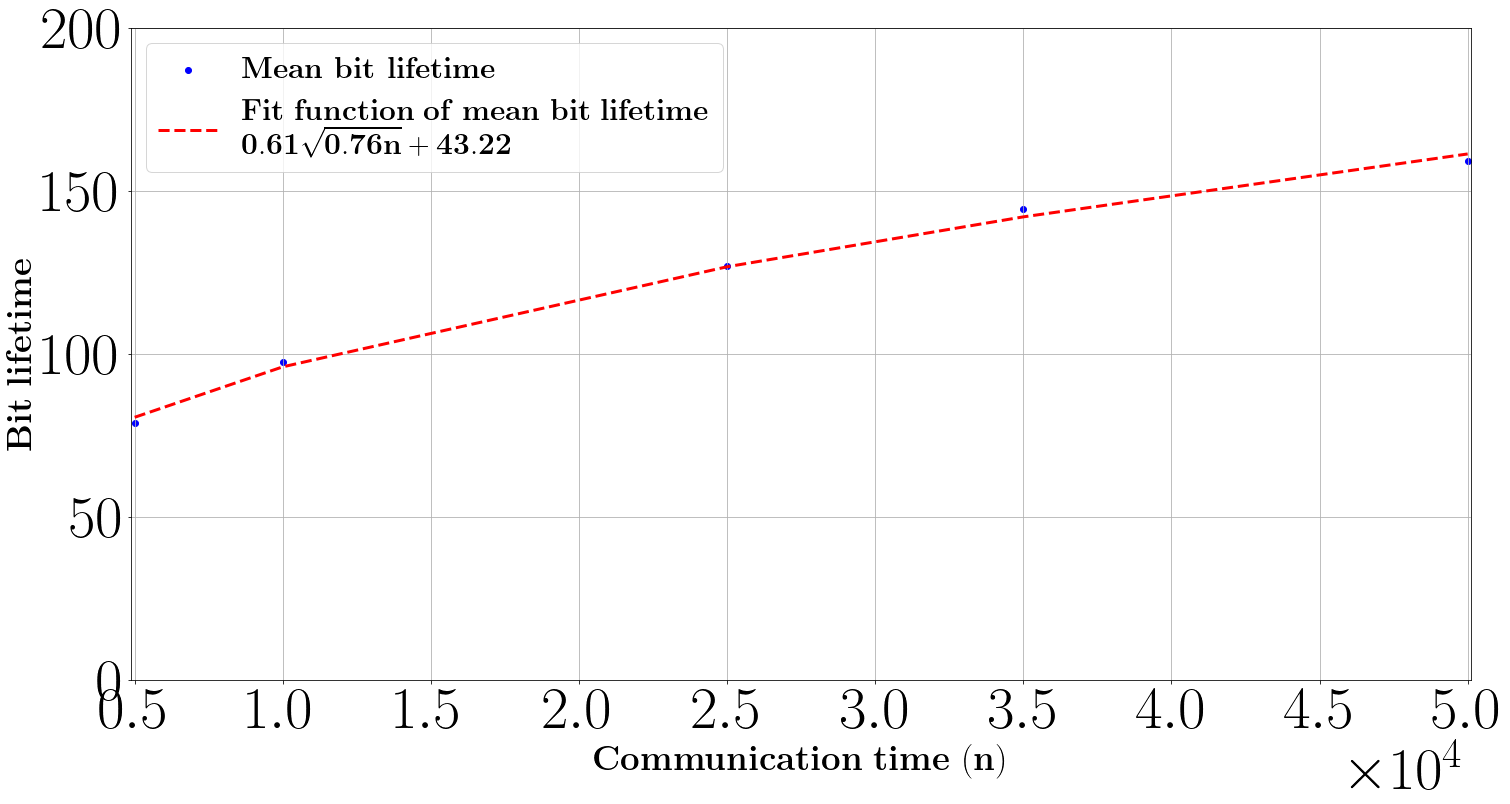

In [23]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



mean_value_T1=np.array([  78.78,   97.43   ,126.88, 144.37, 159.12]) #Mean Life time
Arrive_time=np.array([ 5000,  10000,  25000 , 35000, 50000])  # Different values of n

plt.figure(figsize=(24,12))



## ---- Fit Function for Mean_value packet life time ---- ##

x = Arrive_time
y = mean_value_T1
def fit_func(x, a, b,c):
    return a*np.sqrt(c*x) + b

params = curve_fit(fit_func, x, y)
[a, b,c] = params[0]
print('mean_value_square root_function=','%.2f' %a,'sqrt(','%.2f' %c,'x)+','%.2f' %b)

## ---- Plot Mean_value Fit Function ---- ##
def f1(t):
    return a*np.sqrt(c*x) + b
p2=plt.plot(x, f1(x), '--r',linewidth=3.0)

## ---- Scatter Plot ---- ##

p3=plt.scatter( Arrive_time,mean_value_T1, color='b')

plt.legend((p3,p2[0]), (r'\textbf{Mean bit lifetime}', '$\mathbf{Fit~function~of~mean~bit~lifetime}$ \n  $\mathbf{0.61\sqrt{0.76n}+43.22}$'),fontsize = 30)

plt.xlabel('$\mathbf{Communication~time~(n)}$',size=35)
plt.ylabel('$\mathbf{Bit~lifetime}$',size=35)
plt.rcParams.update({'font.size': 50})
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60)

matplotlib.pyplot.locator_params(axis='y', nbins=5) 
matplotlib.pyplot.locator_params(axis='x', nbins=10) 

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylim(0, 200)
plt.xlim(4890, 50100)
plt.grid()
plt.savefig('filename.jpeg', transparent=True, dpi=100)
plt.rcParams["font.weight"] = "bold"

plt.show()